In [80]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from prophet import Prophet

In [3]:
print(Prophet.__version__)

1.0


### Load Dataset

In [8]:
path = os.path.join('..', 'data', 'monthly-car-sales.csv')
df = pd.read_csv(path, header=0)

In [12]:
df.head(3)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


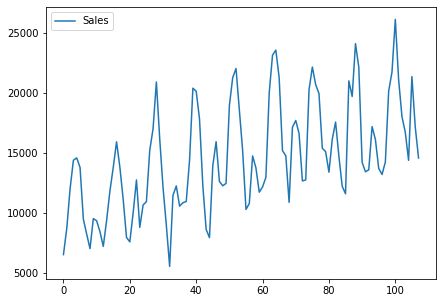

In [18]:
# Draw plot
df.plot(figsize=(7, 5))
plt.show()

#### Forecast Car Sales

In [24]:
# Prepare expected column names
df = df.rename(columns={'Month': 'ds', 'Sales': 'y'})
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m')

In [29]:
# Define the model
model = Prophet()

# Fit the model
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
# define the period to predict
prediction = pd.date_range(start='1968-01', end='1968-12', freq='MS')
prediction = pd.DataFrame(prediction)
prediction.columns = ['ds']
# prediction['ds'] = pd.to_datetime(prediction['ds'], format='%Y-%m-%s')

In [60]:
# forecast the prediction timeline
forecast = model.predict(prediction)

In [61]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14363.556656,12687.356897,15848.919168
1,1968-02-01,14929.449809,13374.366193,16572.878967
2,1968-03-01,20893.417179,19245.811109,22344.409368
3,1968-04-01,22910.515245,21368.784634,24439.579323
4,1968-05-01,24200.784363,22585.781317,25595.333700


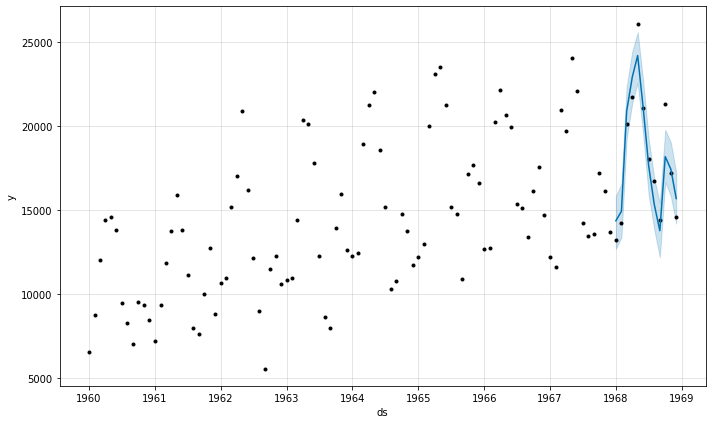

In [62]:
# Plot
model.plot(forecast)
plt.show()

#### Out-of-Sample Forecast

In [63]:
# Make future time range dataset
predict_out = pd.date_range(start='1969-01', end='1969-12', freq='MS')
predict_out = pd.DataFrame(predict_out)
predict_out.columns = ['ds']

In [64]:
forecast_out = model.predict(predict_out)

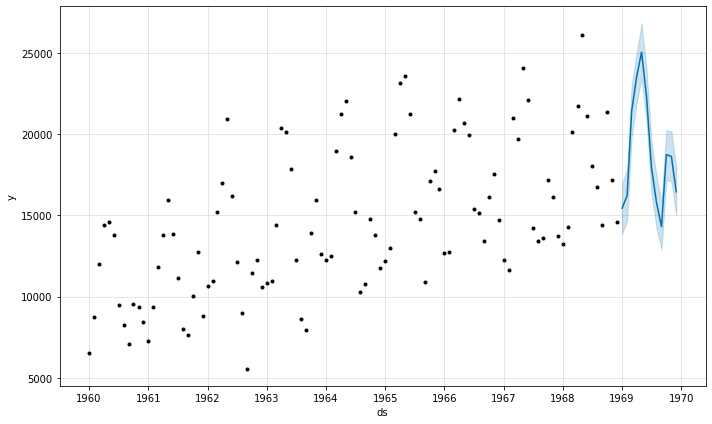

In [65]:
model.plot(forecast_out)
plt.show()

#### Manually Evaluate Forecast Model

In [83]:
train = df.drop(df.index[-12:])

model = Prophet()

# fit model
model.fit(train)

# Make forecast time range
prediction = pd.date_range(start='1968-01', end='1968-12', freq='MS')
prediction = pd.DataFrame(prediction)
prediction.columns = ['ds']

# Forecast
forecast = model.predict(prediction)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
# Calcuate MAE 
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 1336.81


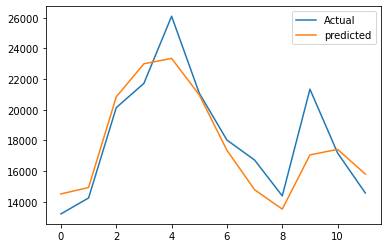

In [86]:
# plot
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

### Jeju Daily Vistor Forecasting

In [95]:
path = os.path.join('..', 'data', 'jeju_visit_daily.csv')
jeju = pd.read_csv(path, delimiter='\t')

In [96]:
jeju.head(3)

,yyyymmdd,domestic,foreign,total
0,20180101,34278,1690,35968
1,20180102,37315,1864,39179
2,20180103,35920,2157,38077


In [102]:
jeju.tail()

,ds,domestic,foreign,total
1060,2020-11-26,34303,163,34466
1061,2020-11-27,31434,130,31564
1062,2020-11-28,28094,148,28242
1063,2020-11-29,26762,130,26892
1064,2020-11-30,24613,106,24719


In [101]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        1065 non-null   datetime64[ns]
 1   domestic  1065 non-null   int64         
 2   foreign   1065 non-null   int64         
 3   total     1065 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 33.4 KB


In [98]:
jeju = jeju.rename(columns={'yyyymmdd': 'ds'})
jeju['ds'] = pd.to_datetime(jeju['ds'], format='%Y%m%d')

In [99]:
jeju_dom = jeju[['ds', 'domestic']]
jeju_for = jeju[['ds', 'foreign']]

jeju_dom.columns = ['ds', 'y']
jeju_for.columns = ['ds', 'y']

In [105]:
jeju_dom_train = jeju_dom.drop(jeju_dom.index[-30:])
jeju_for_train = jeju_for.drop(jeju_for.index[-30:])

In [106]:
# Model: Jeju Domestic
model = Prophet()
model.fit(jeju_dom_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [110]:
prediction = pd.date_range(start='2020-11-01', end='2020-11-30')
prediction = pd.DataFrame(prediction)
prediction.columns = ['ds']

forecast = model.predict(prediction)

In [111]:
y_true = jeju_dom['y'][-30:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 6162.24


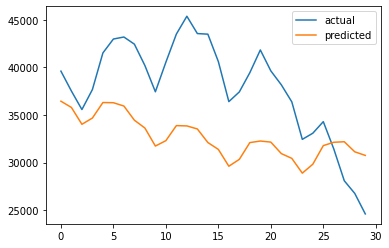

In [113]:
plt.plot(y_true, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()